In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_1 = pd.read_csv("massgap.csv")
df_1 = df_1.loc[df_1['cfar'] < 3.86e-7]
df_1 = df_1.reset_index(drop=True)

df_2 = pd.read_csv("no_massgap.csv")
df_2 = df_2.loc[df_2['cfar'] < 3.86e-7]
df_2 = df_2.reset_index(drop=True)

In [2]:
def conditions(df):
    if ((df['inj_mass1_source_frame'] > 3.0) & (df['inj_mass1_source_frame'] < 5.0)) | ((df['inj_mass2_source_frame'] > 3.0) & (df['inj_mass2_source_frame'] < 5.0)):
        return 1
    else:
        return 0
df = pd.concat([df_1,df_2])
df['mc_rec'] = (df.rec_m1 * df.rec_m2)**(3./5.)/(df.rec_m1 + df.rec_m2)**(1./5.)
df['mtot_rec'] = df.rec_m1 + df.rec_m2 
df = df.sample(frac=1, random_state=300)
df = df.reset_index(drop=True)
df['hasmassgap'] = df.apply(conditions, axis=1)

## Need to work on the convention that m1 > m2


In [3]:
idx =df.loc[df['inj_mass1_source_frame'] < df['inj_mass2_source_frame']].index
df.loc[idx,['inj_mass1_source_frame','inj_mass2_source_frame']] = df.loc[idx,['inj_mass2_source_frame','inj_mass1_source_frame']].values
idx_1 =df.loc[df['inj_m1'] < df['inj_m2']].index
df.loc[idx_1,['inj_m1','inj_m2']] = df.loc[idx_1,['inj_m2','inj_m1']].values
df.loc[idx_1,['inj_spin1z','inj_spin2z']] = df.loc[idx_1,['inj_spin2z','inj_spin2z']].values

##  Focusing on reconstructed mass greater than 120


In [4]:
df = df.loc[df['rec_m1'] > 120]
print(df['hasmassgap'].value_counts())
print(len(df))

0    479
1    283
Name: hasmassgap, dtype: int64
762


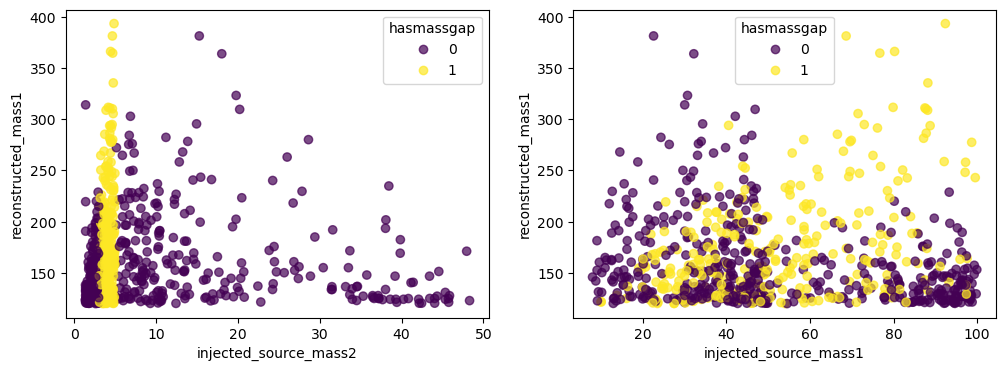

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
scatter1 = ax1.scatter(df['inj_mass2_source_frame'], df['rec_m1'],c=df['hasmassgap'], alpha=0.7)
ax1.legend(handles=scatter1.legend_elements()[0], 
           labels=[0,1],
           title="hasmassgap")

ax1.set_xlabel("injected_source_mass2")
ax1.set_ylabel("reconstructed_mass1")
scatter2 = plt.scatter(df['inj_mass1_source_frame'], df['rec_m1'],c=df['hasmassgap'], alpha=0.7)
ax2.legend(handles=scatter2.legend_elements()[0], 
           labels=[0,1],
           title="hasmassgap")

ax2.set_xlabel("injected_source_mass1")
ax2.set_ylabel("reconstructed_mass1")
plt.show()

### This is interesting. It seems most of the highmass reconstruction have source_mass1 > 10 and source_mass2 < 10 

Text(0, 0.5, 'rec_mc det. frame')

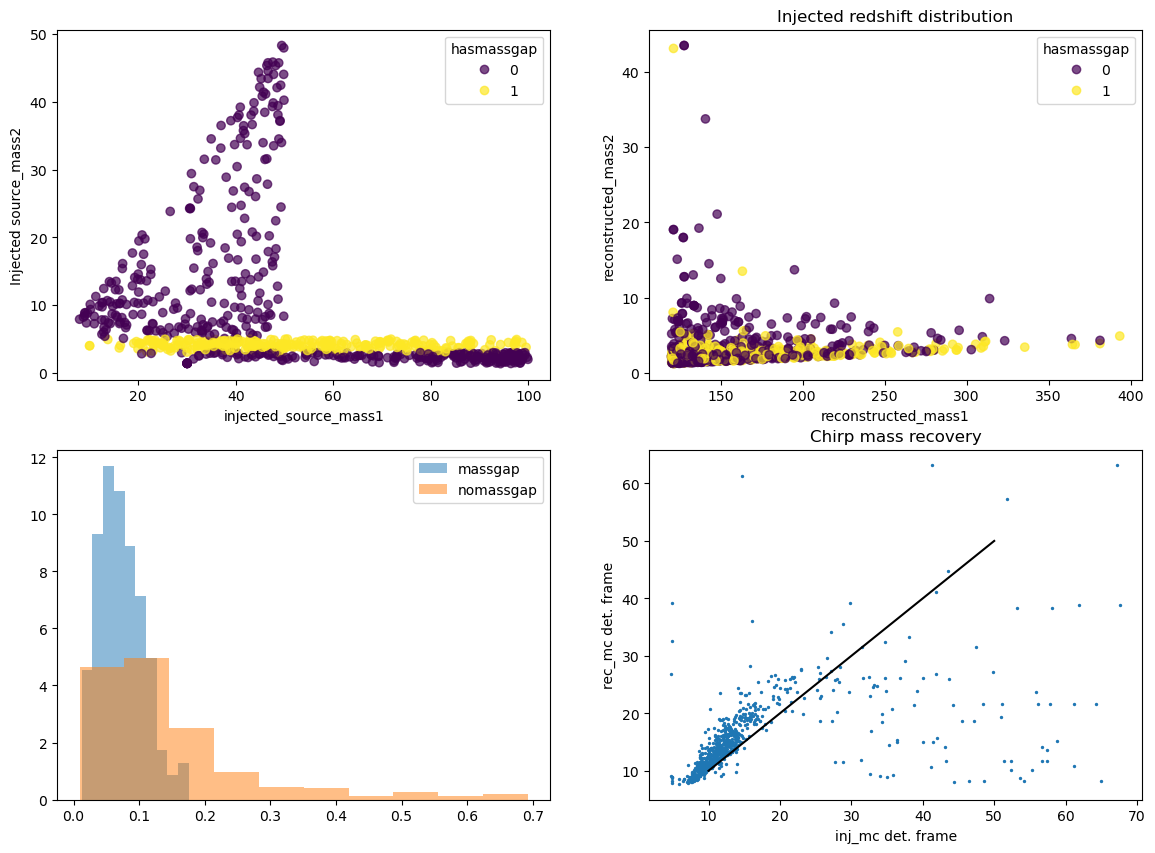

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
scatter1 = ax1.scatter(df['inj_mass1_source_frame'], df['inj_mass2_source_frame'],c=df['hasmassgap'], alpha=0.7)
ax1.legend(handles=scatter1.legend_elements()[0], 
           labels=[0,1],
           title="hasmassgap")

ax1.set_xlabel("injected_source_mass1")
ax1.set_ylabel("Injected source_mass2")
scatter2 = ax2.scatter(df['rec_m1'], df['rec_m2'],c=df['hasmassgap'], alpha=0.7)
ax2.legend(handles=scatter2.legend_elements()[0], 
           labels=[0,1],
           title="hasmassgap")

ax2.set_xlabel("reconstructed_mass1")
ax2.set_ylabel("reconstructed_mass2")
ax2.set_title("Injected redshift distribution")

ax3.hist(df.loc[df.hasmassgap.astype(bool)]['inj_redshift'], label='massgap', density=True, alpha=0.5)
ax3.hist(df.loc[~df.hasmassgap.astype(bool)]['inj_redshift'], label='nomassgap', density=True, alpha=0.5)
ax3.legend()

def mchirp(m1, m2):
    return (m1*m2)**(3./5.)/(m1 + m2)**(1./5.)

ax4.set_title('Chirp mass recovery')
ax4.scatter(
    mchirp(df.inj_m1, df.inj_m2),
    mchirp(df.rec_m1, df.rec_m2),
    s=2
)
x = np.linspace(10, 50,num=2)
y = x
ax4.plot(x, y, 'k-')
ax4.set_xlabel('inj_mc det. frame')
ax4.set_ylabel('rec_mc det. frame')

## Looking into redshifts among triggers for which has_massgap == 1

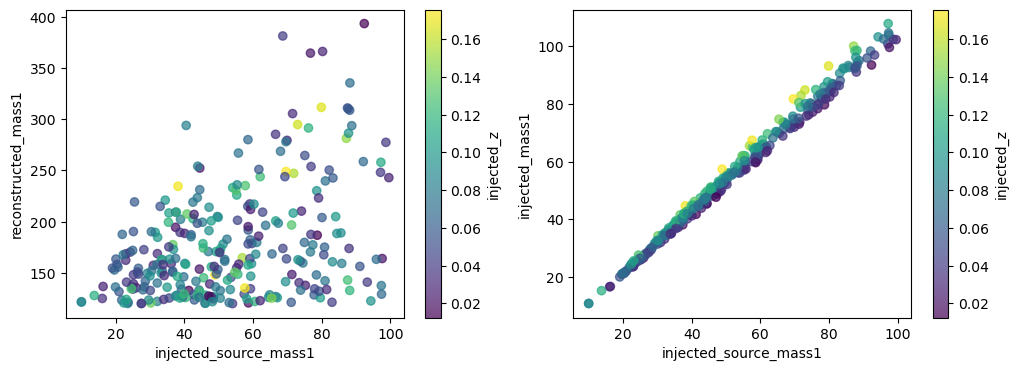

In [7]:
mass_gap_df = df.loc[df['hasmassgap'] == 1]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
im1 = ax1.scatter(mass_gap_df['inj_mass1_source_frame'], mass_gap_df['rec_m1'],c=mass_gap_df['inj_redshift'], alpha=0.7)
cbar1 = fig.colorbar(im1)
cbar1.set_label("injected_z")
ax1.set_xlabel("injected_source_mass1")
ax1.set_ylabel("reconstructed_mass1")

im2 = ax2.scatter(mass_gap_df['inj_mass1_source_frame'], mass_gap_df['inj_m1'],c=mass_gap_df['inj_redshift'], alpha=0.7)
cbar2 = fig.colorbar(im2)
cbar2.set_label("injected_z")
ax2.set_xlabel("injected_source_mass1")
ax2.set_ylabel("injected_mass1")
plt.show()


### The redshift injected are not large enough to cause m1_injected to drastically increase causing increase in m1_reconstructed

## Lets look at the chirp mass reconstructions for these m1_rec > 120 triggers


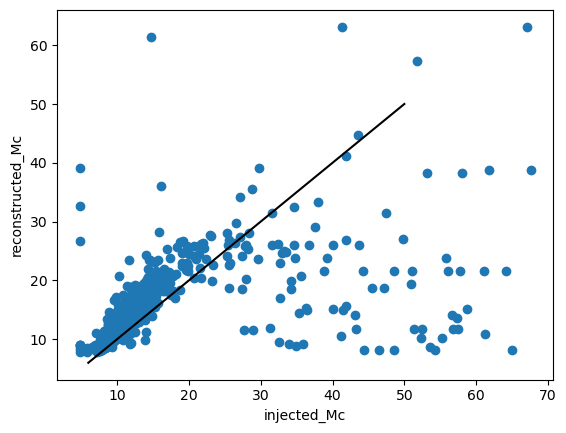

In [8]:
df['mc_inj'] = (df.inj_m1 * df.inj_m2)**(3./5.)/(df.inj_m1 + df.inj_m2)**(1./5.)
plt.scatter(df['mc_inj'], df['mc_rec'])
x = np.linspace(6,50,num=100)
y= x
plt.plot(x,y, 'k-')
#plt.colorbar(label = "injected z")
plt.xlabel("injected_Mc")
plt.ylabel("reconstructed_Mc")
plt.show()

### Significant number of these triggers have overestimated chirp mass.

## Lets look at spins for (m1_rec>120 ) to check if there's anything unique


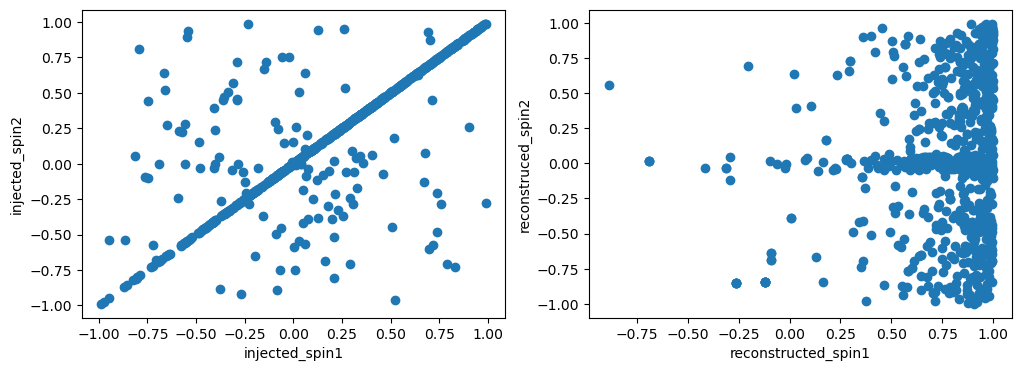

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
im1 = ax1.scatter(df['inj_spin1z'], df['inj_spin2z'])
ax1.set_xlabel("injected_spin1")
ax1.set_ylabel("injected_spin2")

im2 = ax2.scatter(df['rec_spin1z'], df['rec_spin2z'])
ax2.set_xlabel("reconstructed_spin1")
ax2.set_ylabel("reconstruced_spin2")
plt.show()


### Significant number of high spin1 found

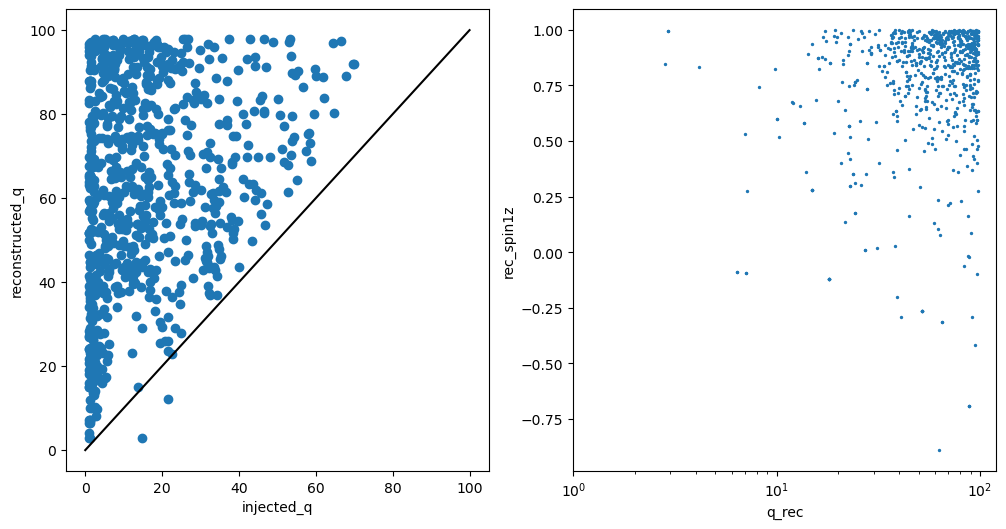

In [10]:
# inverting the sense of mass ratio, to visualize better
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df['q_inj'] = df.inj_m1/df.inj_m2
df['q_rec'] = df.rec_m1/df.rec_m2
ax1.scatter(df['q_inj'], df['q_rec'])
x = np.linspace(0,100,num=2)
y = x
ax1.plot(x,y, 'k-')
ax1.set_xlabel("injected_q")
ax1.set_ylabel("reconstructed_q")


ax2.scatter(df['q_rec'],  df['rec_spin1z'], s=2)
ax2.set_xscale('log')
ax2.set_xlabel("q_rec")
ax2.set_ylabel("rec_spin1z")
ax2.set_xlim((1, 120))

plt.show()

### mass ratios are reconstructed very poorly for these triggers.

## In general, some (762) triggers with mass combination (m1,m2) = (10-100, 0-50) are being reconstructed with primary mass > 120 and with significatly high spins. These triggers contains significant amount of  has_massgap events (283). This seems to create some higher than expected probabilities in the parameter_sweep at high mass region
